In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [5]:
# Read the CSV file
mall_customers_df = pd.read_csv(r'C:\Users\lenovo\Documents\datasets\int_files\Mall_Customers.csv')



In [6]:
# Display the first few rows of the dataframe
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall_customers_df.shape

(200, 5)

In [4]:
# Check for missing values
missing_values = mall_customers_df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

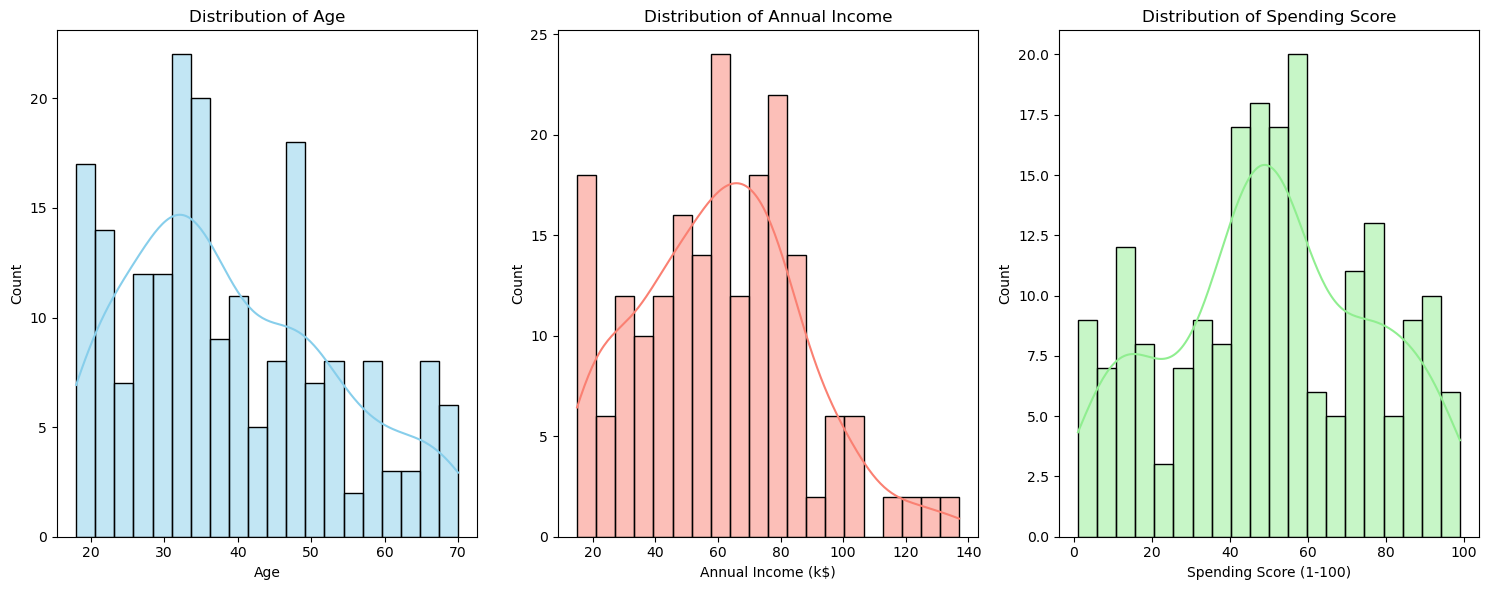

In [5]:
# EDA - Visualizing the distribution of features
plt.figure(figsize=(15, 6))

# Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(mall_customers_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

# Distribution of Annual Income
plt.subplot(1, 3, 2)
sns.histplot(mall_customers_df['Annual Income (k$)'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Annual Income')

# Distribution of Spending Score
plt.subplot(1, 3, 3)
sns.histplot(mall_customers_df['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

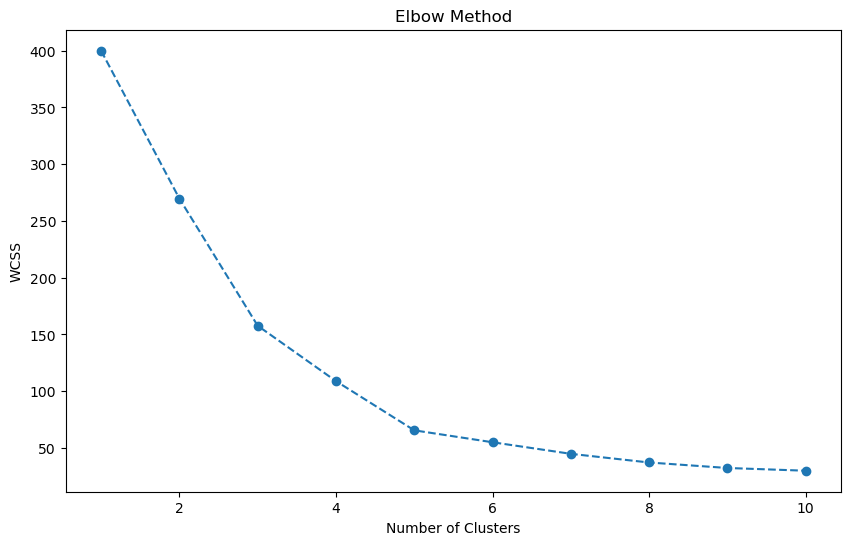

Warnings suppressed and n_init parameter explicitly set to 10.


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Feature selection for clustering
X = mall_customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()
print('Warnings suppressed and n_init parameter explicitly set to 10.')

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X_scaled)

KMeans(n_clusters=5)

In [15]:
# Predicting the labels for the dataset
labels1 = model.predict(X_scaled)

# Printing the labels and their count
print(labels1)
print(len(labels1))



[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 3 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
200


In [16]:
# Obtaining the centroids
centroids = model.cluster_centers_
print(centroids)



[[ 0.99158305  1.23950275]
 [-1.30751869 -1.13696536]
 [ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [-1.32954532  1.13217788]]


In [19]:
# Adding the cluster labels to the original dataframe
mall_customers_df['Cluster Group'] = labels1

# Displaying the first few rows of the dataframe with the cluster labels
print(mall_customers_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  Cluster Group  
0        4              1  
1        2              4  
2        4              1  
3        2              4  
4        4              1  


In [21]:
from sklearn.cluster import KMeans


# Building the model
model2 = KMeans(n_clusters=5)
model2.fit(X_scaled)  



KMeans(n_clusters=5)

In [22]:
# Predicting the clusters
labels2 = model2.predict(X_scaled)  # Replace X_scaled accordingly
print(labels2)
print(len(labels2))

# Adding cluster labels 
mall_customers_df['Cluster2'] = labels2

# Displaying the updated dataframe
print(mall_customers_df.head())

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]
200


In [23]:
# Adding cluster labels 
mall_customers_df['Cluster2'] = labels2

# Displaying the updated dataframe
print(mall_customers_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  Cluster Group  Cluster2  
0        4              1         4  
1        2              4         1  
2        4              1         4  
3        2              4         1  
4        4              1         4  


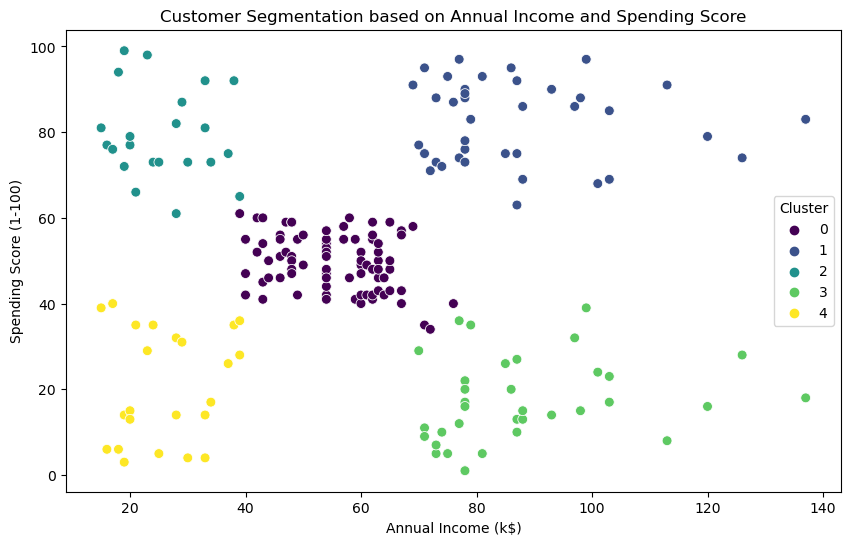

In [25]:
# Perform K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
mall_customers_df['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_customers_df, hue='Cluster', palette='viridis', s=50)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()